### 1. Baseline에서는 어떻게 Data를 가공할까? by 이현규님

> baseline code인 load_data가 어떤 식으로 동작하는지에 관한 글

In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset_dir = "/opt/ml/input/data/train/train.tsv"

In [3]:
dataset = pd.read_csv(dataset_dir, delimiter='\t', header=None)

In [4]:
dataset.head()

,0,1,2,3,4,5,6,7,8
0,wikipedia-24896-25-30-33-19-21,영국에서 사용되는 스포츠 유틸리티 자동차의 브랜드로는 랜드로버(Land Rover)...,랜드로버,30,33,자동차,19,21,단체:제작
1,wikipedia-12728-224-5-7-42-44,"선거에서 민주당은 해산 전 의석인 230석에 한참 못 미치는 57석(지역구 27석,...",민주당,5,7,27석,42,44,관계_없음
2,wikipedia-28460-3-0-7-9-12,유럽 축구 연맹(UEFA) 집행위원회는 2014년 1월 24일에 열린 회의를 통해 ...,유럽 축구 연맹,0,7,UEFA,9,12,단체:별칭
3,wikipedia-11479-37-24-26-3-5,"용병 공격수 챠디의 부진과 시즌 초 활약한 강수일의 침체, 시즌 중반에 영입한 세르...",강수일,24,26,공격수,3,5,인물:직업/직함
4,wikipedia-15581-6-0-2-32-40,람캄행 왕은 1237년에서 1247년 사이 수코타이의 왕 퍼쿤 씨 인트라팃과 쓰엉 ...,람캄행,0,2,퍼쿤 씨 인트라팃,32,40,인물:부모님


In [5]:
from Pstage_03_KLUE_Relation_extraction.load_data import *

In [6]:
train_dataset = load_data(dataset_dir)

In [7]:
train_dataset

,sentence,entity_01,entity_02,label
0,영국에서 사용되는 스포츠 유틸리티 자동차의 브랜드로는 랜드로버(Land Rover)...,랜드로버,자동차,17
1,"선거에서 민주당은 해산 전 의석인 230석에 한참 못 미치는 57석(지역구 27석,...",민주당,27석,0
2,유럽 축구 연맹(UEFA) 집행위원회는 2014년 1월 24일에 열린 회의를 통해 ...,유럽 축구 연맹,UEFA,6
3,"용병 공격수 챠디의 부진과 시즌 초 활약한 강수일의 침체, 시즌 중반에 영입한 세르...",강수일,공격수,2
4,람캄행 왕은 1237년에서 1247년 사이 수코타이의 왕 퍼쿤 씨 인트라팃과 쓰엉 ...,람캄행,퍼쿤 씨 인트라팃,8
...,...,...,...,...
8995,2002년 FIFA 월드컵 사우디아라비아와의 1차전에서 독일은 8-0으로 승리하였는...,사우디아라비아,2002년,0
8996,일본의 2대 메이커인 토요타와 닛산은 시장 점유율을 높이기 위한 신차 개발을 계속하...,토요타,일본,9
8997,방호의의 손자 방덕룡(方德龍)은 1588년(선조 21년) 무과에 급제하고 낙안군수로...,방덕룡,선무원종공신(宣武原從功臣),2
8998,LG전자는 올해 초 국내시장에 출시한 2020년형 ‘LG 그램’ 시리즈를 이달부터 ...,LG전자,북미,0


In [8]:
train_label = train_dataset['label'].values
train_dataset.head()

,sentence,entity_01,entity_02,label
0,영국에서 사용되는 스포츠 유틸리티 자동차의 브랜드로는 랜드로버(Land Rover)...,랜드로버,자동차,17
1,"선거에서 민주당은 해산 전 의석인 230석에 한참 못 미치는 57석(지역구 27석,...",민주당,27석,0
2,유럽 축구 연맹(UEFA) 집행위원회는 2014년 1월 24일에 열린 회의를 통해 ...,유럽 축구 연맹,UEFA,6
3,"용병 공격수 챠디의 부진과 시즌 초 활약한 강수일의 침체, 시즌 중반에 영입한 세르...",강수일,공격수,2
4,람캄행 왕은 1237년에서 1247년 사이 수코타이의 왕 퍼쿤 씨 인트라팃과 쓰엉 ...,람캄행,퍼쿤 씨 인트라팃,8


### 필요한 라이브러리 호출

In [9]:
!pip install transformers
!pip install ipywidgets

from transformers import AutoModel, AutoTokenizer, BertTokenizer
MODEL_NAME = "bert-base-multilingual-cased" 

In [10]:
model = AutoModel.from_pretrained(MODEL_NAME)
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

In [11]:
train_dataset.head(1)

,sentence,entity_01,entity_02,label
0,영국에서 사용되는 스포츠 유틸리티 자동차의 브랜드로는 랜드로버(Land Rover)...,랜드로버,자동차,17


### 오늘 배운 huggingface를 연습해보자

In [12]:
text = train_dataset.sentence[0] # train_dataset.loc[0, 'sentence']
print(text)

영국에서 사용되는 스포츠 유틸리티 자동차의 브랜드로는 랜드로버(Land Rover)와 지프(Jeep)가 있으며, 이 브랜드들은 자동차의 종류를 일컫는 말로 사용되기도 한다.


In [14]:
tokenized = tokenizer(text, return_tensors="pt")
for key, value in tokenized.items():
    print(f"key: {key}\nvalue: {value}")

key: input_ids
value: tensor([[   101,  50266,  11489,   9405,  24974,  24683,   9477,  90578,   9625,
         119376,  12692,  45725,   9651,  99183,  10459,   9376,  42771,  70186,
           9167,  15001,  11261,  41605,    113,  12001,  57836,    114,   9590,
           9706,  28396,    113,  13796,  19986,    114,   8843,  22634,    117,
           9638,   9376,  42771,  22879,   9651,  99183,  10459,   9684,  46520,
          11513,   9641, 119298,  11018,   9251,  11261,   9405,  24974, 118800,
          27792,  16139,    119,    102]])
key: token_type_ids
value: tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
key: attention_mask
value: tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 

In [15]:
tokenized_text = tokenizer.tokenize(text)
print(tokenized_text)

['영국', '##에서', '사', '##용', '##되는', '스', '##포츠', '유', '##틸', '##리', '##티', '자', '##동차', '##의', '브', '##랜드', '##로는', '랜', '##드', '##로', '##버', '(', 'Land', 'Rover', ')', '와', '지', '##프', '(', 'Je', '##ep', ')', '가', '있으며', ',', '이', '브', '##랜드', '##들은', '자', '##동차', '##의', '종', '##류', '##를', '일', '##컫', '##는', '말', '##로', '사', '##용', '##되', '##기도', '한다', '.']


In [17]:
input_ids = tokenizer.encode(text)
print(input_ids)

[101, 50266, 11489, 9405, 24974, 24683, 9477, 90578, 9625, 119376, 12692, 45725, 9651, 99183, 10459, 9376, 42771, 70186, 9167, 15001, 11261, 41605, 113, 12001, 57836, 114, 9590, 9706, 28396, 113, 13796, 19986, 114, 8843, 22634, 117, 9638, 9376, 42771, 22879, 9651, 99183, 10459, 9684, 46520, 11513, 9641, 119298, 11018, 9251, 11261, 9405, 24974, 118800, 27792, 16139, 119, 102]


In [18]:
decoded_ids = tokenizer.decode(input_ids)
print(decoded_ids)

[CLS] 영국에서 사용되는 스포츠 유틸리티 자동차의 브랜드로는 랜드로버 ( Land Rover ) 와 지프 ( Jeep ) 가 있으며, 이 브랜드들은 자동차의 종류를 일컫는 말로 사용되기도 한다. [SEP]


In [25]:
from pprint import PrettyPrinter as ppp
from pprint import pprint as pp

In [26]:
tokenized_train = tokenized_dataset(train_dataset, tokenizer)
pp(tokenized_train)

{'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]),
 'input_ids': tensor([[   101,   9167,  15001,  ...,      0,      0,      0],
        [   101,   9311,  16323,  ...,      0,      0,      0],
        [   101,  68495,  37905,  ...,      0,      0,      0],
        ...,
        [   101,   9328, 118782,  ...,    123, 101322,    102],
        [   101,  49780,  16617,  ...,      0,      0,      0],
        [   101,   9730,  30858,  ...,      0,      0,      0]]),
 'token_type_ids': tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 1, 1, 1],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]])}


In [27]:
RE_train_dataset = RE_Dataset(tokenized_train, train_label)

In [29]:
RE_train_dataset = iter(RE_train_dataset) # transformer에서 제공하는 Trainer 객체의 input
pp(next(RE_train_dataset))

{'attention_mask': tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0]),
 'input_ids': tensor([   101,   9311,  16323,  21928,    102,  10365,  40958,    102,   9428,
         41521,  11489,   9311,  16323,  21928,  10892,   9960,  21386,   9665,
          9637,  40958,  12030,  16888,  40958,  10530,   9954, 119251,   9290,
          9309,  72087,  11817,  40958,    113,  58939,  17196,  10365,  40958,
           117,   9379,  58762,  14423,  37824,  10244,  40958,    114,   9633,
          9999, 118813,  12178,   9083,   8924,  90821,    119,    102,      0,
             0,      0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,  

### 2. "K-Tokenizer가 더 좋을까?" + 이런 것도 Entity가 되는 구나 by 구건모님

> 다국어 토크나이저(bert-base-multilingual-cased) vs 한국어 토크나이저(koelctra-small-discriminator)

In [31]:
!pip install seaborn

     |████████████████████████████████| 285 kB 2.0 MB/s eta 0:00:01
     |████████████████████████████████| 10.3 MB 20.8 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 43.0 MB/s eta 0:00:01


In [32]:
import pandas as pd
import seaborn as sns
from transformers import ElectraTokenizer

In [45]:
multi_tokenizer = AutoTokenizer.from_pretrained("bert-base-multilingual-cased")
k_tokenizer = ElectraTokenizer.from_pretrained("monologg/koelectra-small-discriminator", do_lower_case=False)

In [36]:
train_dataset.head(3)

,sentence,entity_01,entity_02,label
0,영국에서 사용되는 스포츠 유틸리티 자동차의 브랜드로는 랜드로버(Land Rover)...,랜드로버,자동차,17
1,"선거에서 민주당은 해산 전 의석인 230석에 한참 못 미치는 57석(지역구 27석,...",민주당,27석,0
2,유럽 축구 연맹(UEFA) 집행위원회는 2014년 1월 24일에 열린 회의를 통해 ...,유럽 축구 연맹,UEFA,6


In [46]:
multi_unknown = set()
k_unknown = set()

In [49]:
for i, rows in train_dataset.iterrows():
    e1, e2 = rows['entity_01'], rows['entity_02']
    
    if multi_tokenizer.tokenize(e1)[0] == "[UNK]":
        multi_unknown.add(e1)
    if k_tokenizer.tokenize(e1)[0] == "[UNK]":
        k_unknown.add(e1)
    if multi_tokenizer.tokenize(e2)[0] == "[UNK]":
        multi_unknown.add(e2)
    if k_tokenizer.tokenize(e2)[0] == "[UNK]":
        k_unknown.add(e2)

In [50]:
pp(multi_unknown)
pp(k_unknown) # 이모티콘(?), 한자 등이 포함되면 Unknown 처리된 것을 확인할 수 있음

{'☎',
 '㈜',
 '㈜거명이앤씨',
 '㈜광주글로벌모터스',
 '㈜두양전력',
 '㈜드림씨엔지',
 '㈜뜨레찬',
 '㈜로우카본테크',
 '㈜빵굽는사람들',
 '㈜오뚜기',
 '㈜진성퍼니처',
 '㈜호원',
 '개똥벌레',
 '갸넨드라',
 '경남스틸㈜',
 '경인아라뱃길',
 '더늠길',
 '됭케르크',
 '드림웍스',
 '랠프 애셔 앨퍼',
 '레이쥔',
 '로퀜스',
 '맬 영',
 '맬컴',
 '맬컴 엑스',
 '밀짚모자 해적단',
 '바츨라프 하벨',
 '브뢴뷔 IF',
 '뽀뽀뽀',
 '뽀식이',
 '뽐뿌커뮤니케이션',
 '뿌엥',
 '뿜뿜',
 '뿡뿡이',
 '스킵',
 '쌤소나이트',
 '쌤소나이트코리아',
 '썸바디2',
 '쑨시엔위',
 '쑨양',
 '아녜스',
 '아르툠 미코얀',
 '에미넴',
 '에스파뇰',
 '엥겔스',
 '왕쥔',
 '욜란다 데 아라곤',
 '우젠슝',
 '웅진씽크빅',
 '원흠',
 '위쾨넨',
 '윰댕',
 '응우옌반냑',
 '이궈달라',
 '일리리쿰',
 '잣나무',
 '조치흠',
 '쥘 베른',
 '쥘 페리',
 '코헛',
 '쿠샨 왕조',
 '킵 손',
 '킵차크 칸국',
 '투게더광산나눔문화재단',
 '펭수',
 '핏줄',
 '한국동서발전㈜',
 '한땀봉사단',
 '화뤄겅',
 '황페이훙',
 '흄',
 '힉스 메커니즘'}
{'S★스파이시',
 '☎',
 '〈창조〉',
 '《In Utero》',
 '《라이온 킹》',
 '《소년 메이드》',
 '㈜',
 '㈜거명이앤씨',
 '㈜광주글로벌모터스',
 '㈜두양전력',
 '㈜드림씨엔지',
 '㈜뜨레찬',
 '㈜로우카본테크',
 '㈜빵굽는사람들',
 '㈜오뚜기',
 '㈜진성퍼니처',
 '㈜호원',
 '中宗',
 '丸彫',
 '刘骅骐骥',
 '前 새누리당 비례대표',
 '北条氏',
 '南山',
 '姜明求',
 '宋',
 '帶原君',
 '張道斌',
 '慶應',
 '成遇',
 '曹',
 '李址鎔',
 '李承萬',
 '李福男',
 '李秀亨',
 '李雄',
 '李集',


In [52]:
print("Only Multi Tokenizer can catch the following!")
for word in k_unknown:
    if word not in multi_unknown:
        print(word, end=", ")

Only Multi Tokenizer can catch the following!
S★스파이시, 黃皓, 成遇, 北条氏, 李秀亨, 前 새누리당 비례대표, 袁譚, 刘骅骐骥, 《In Utero》, 〈창조〉, 曹, 李承萬, 李雄, 竇武, 金, 沙梁部, 丸彫, 李福男, 《라이온 킹》, 宋, 姜明求, 張道斌, 蔚山放送, 臨海君, 葛文王, 李集, 李址鎔, 慶應, 帶原君, 森 喜朗, 《소년 메이드》, 中宗, 南山, 空大師, 

In [53]:
print("Only K-Tokenizer can catch the following!")
for word in multi_unknown:
    if word not in k_unknown:
        print(word, end=", ")

Only K-Tokenizer can catch the following!
쿠샨 왕조, 뽀식이, 한땀봉사단, 쌤소나이트코리아, 핏줄, 조치흠, 욜란다 데 아라곤, 왕쥔, 쥘 베른, 뿡뿡이, 아녜스, 뿜뿜, 아르툠 미코얀, 랠프 애셔 앨퍼, 윰댕, 위쾨넨, 밀짚모자 해적단, 뿌엥, 맬컴, 이궈달라, 투게더광산나눔문화재단, 웅진씽크빅, 에스파뇰, 맬 영, 뽀뽀뽀, 킵차크 칸국, 바츨라프 하벨, 로퀜스, 경인아라뱃길, 황페이훙, 코헛, 됭케르크, 드림웍스, 우젠슝, 원흠, 쌤소나이트, 스킵, 응우옌반냑, 맬컴 엑스, 갸넨드라, 잣나무, 펭수, 킵 손, 쑨양, 더늠길, 썸바디2, 쥘 페리, 쑨시엔위, 엥겔스, 개똥벌레, 흄, 브뢴뷔 IF, 화뤄겅, 레이쥔, 일리리쿰, 뽐뿌커뮤니케이션, 에미넴, 힉스 메커니즘, 

### 3. [EDA] UNK 토큰 분포 확인하기 by 진소정님

> 원본 코드에 개인적으로 리팩토링을 하였습니다.

In [54]:
sentences = list(train_dataset['sentence'])

In [81]:
tokenized_sentences = []

for sentence in sentences:
    tokenized_sentences.append(multi_tokenizer.tokenize(sentence))
    
print(tokenized_sentences[0])

['영국', '##에서', '사', '##용', '##되는', '스', '##포츠', '유', '##틸', '##리', '##티', '자', '##동차', '##의', '브', '##랜드', '##로는', '랜', '##드', '##로', '##버', '(', 'Land', 'Rover', ')', '와', '지', '##프', '(', 'Je', '##ep', ')', '가', '있으며', ',', '이', '브', '##랜드', '##들은', '자', '##동차', '##의', '종', '##류', '##를', '일', '##컫', '##는', '말', '##로', '사', '##용', '##되', '##기도', '한다', '.']


In [82]:
from collections import defaultdict

UNK_counter = defaultdict(int)
UNK_col = []

for sentence in tokenized_sentences:
    cnt = sentence.count('[UNK]')
    UNK_counter[cnt] += 1
    UNK_col.append(cnt)

In [83]:
UNK_counter

defaultdict(int,
            {0: 7346,
             1: 457,
             4: 394,
             2: 610,
             8: 23,
             5: 34,
             7: 10,
             3: 62,
             6: 47,
             9: 8,
             12: 5,
             10: 2,
             18: 1,
             27: 1})

In [84]:
import copy
temp = train_dataset.copy()

In [85]:
temp['UNK'] = UNK_col

In [86]:
temp.head()

,sentence,entity_01,entity_02,label,UNK
0,영국에서 사용되는 스포츠 유틸리티 자동차의 브랜드로는 랜드로버(Land Rover)...,랜드로버,자동차,17,0
1,"선거에서 민주당은 해산 전 의석인 230석에 한참 못 미치는 57석(지역구 27석,...",민주당,27석,0,0
2,유럽 축구 연맹(UEFA) 집행위원회는 2014년 1월 24일에 열린 회의를 통해 ...,유럽 축구 연맹,UEFA,6,0
3,"용병 공격수 챠디의 부진과 시즌 초 활약한 강수일의 침체, 시즌 중반에 영입한 세르...",강수일,공격수,2,1
4,람캄행 왕은 1237년에서 1247년 사이 수코타이의 왕 퍼쿤 씨 인트라팃과 쓰엉 ...,람캄행,퍼쿤 씨 인트라팃,8,1


<AxesSubplot:xlabel='UNK', ylabel='count'>

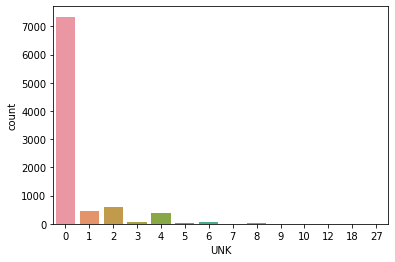

In [87]:
sns.countplot(x='UNK', data=temp)

**대체 UNK 토큰이 27개가 있는 문장은 뭘까????**

In [92]:
temp.loc[temp['UNK']==27]

,sentence,entity_01,entity_02,label,UNK
8600,‘자우자’의 어근 (')는 ‘가운데’를 뜻하기 때문에 ‘알-자우자’는 대충 ‘가운데...,베텔게우스,오리온자리,0,27


In [98]:
wow = temp.loc[8600, 'sentence']

**따옴표 때문일까??**

In [100]:
print(multi_tokenizer.tokenize(wow))

['[UNK]', '자', '##우', '##자', '[UNK]', '의', '어', '##근', '(', "'", ')', '는', '[UNK]', '가운데', '[UNK]', '를', '뜻', '##하기', '때문에', '[UNK]', '알', '-', '자', '##우', '##자', '[UNK]', '는', '대', '##충', '[UNK]', '가운데', '것', '[UNK]', '을', '의', '##미', '##한다', '.', '이후', '[UNK]', '알', '자', '##우', '##자', '[UNK]', '는', '오', '##리', '##온', '##자', '##리', '##와', '쌍', '##둥', '##이자', '##리를', '일', '##컫', '##는', '아', '##랍', '##어', '단', '##어로', '굳', '##어졌다', '.', '현재', '아', '##랍', '##어로', '오', '##리', '##온', '##을', '일', '##컫', '##는', '표', '##기는', '[UNK]', '알', '자', '##바', '[UNK]', '이며', ',', '베', '##텔', '##게', '##우스', '##의', '이', '##름', '##에', '포', '##함', '##된', '[UNK]', '알', '자', '##우', '##자', '[UNK]', '도', '사', '##용', '##하고', '있다', '.', '17', '##세기', '영국', '번', '##역', '##가', '에', '##드', '##문', '##드', '칠', '##미', '##드는', '크', '##리스', '##트', '##마', '##누', '##스의', '표', '##기를', '가', '##져', '##와', '[UNK]', '예', '##드', '알', '##게', '##우', '##제', '[UNK]', '(', '"', 'I', '##ed', 'Al', '##geu', '##ze', '"', ')', '라고', '이'

**그렇다**